# PRÁCTICA 1
# CUANTIFICACIÓN UNIFORME Y DITHERING

## La clase uniformeSQ
La clase UniformSQ implementada en scalib permite construir cuantificadores uniformes a partir
de una tasa de bits por muestra deseada (que establece el número de niveles de cuantificación) y el
rango de entrada del cuantificador (rango de las señales que vamos a cuantificar). A continuación se
muestra un ejemplo de uso de UniformSQ para cuantificar una señal unidimensional

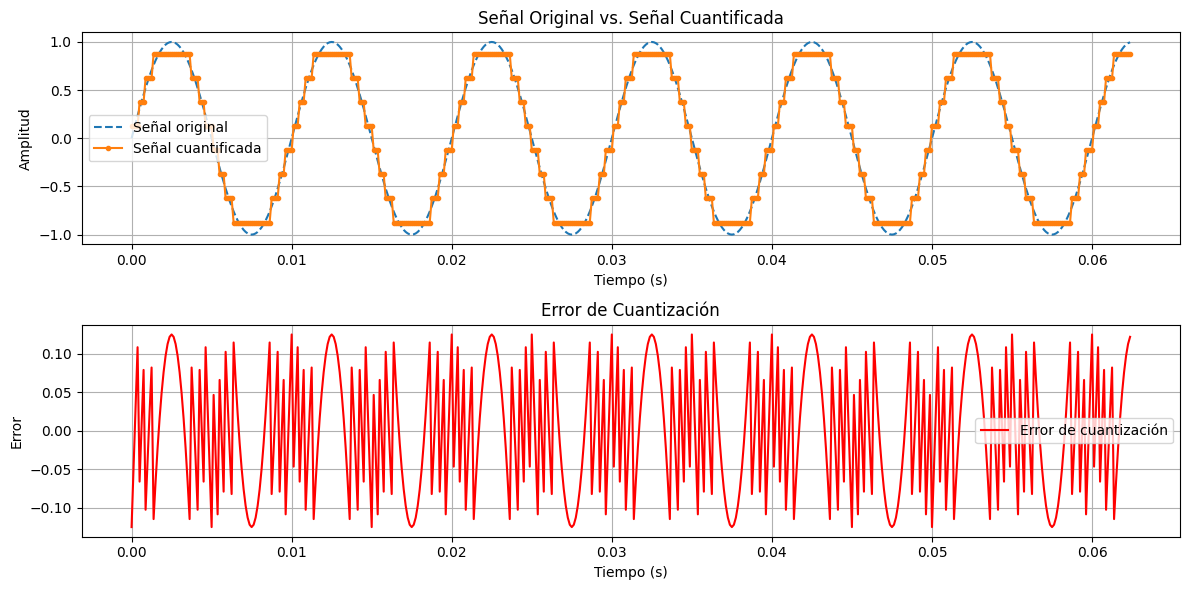

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ

# Parámetros de la señal
fs = 8000  # Frecuencia de muestreo de 8 kHz
t = np.arange(0, 2, 1/fs)  # Vector de tiempos de 2 segundos de duración
x = np.sin(2 * np.pi * 100 * t)  # Señal sinusoidal de 100 Hz

# Configuración de la cuantización
xRange = (-1, 1)  # Rango de la señal x
b = 3  # Número de bits por muestra

# Cuantificación uniforme
qtz = UniformSQ(b, xRange)  # Creación del cuantificador
xq = qtz.quantize(x)  # Cuantificación de la señal

# Cálculo del error de cuantización
error = x - xq

# Representación gráfica
plt.figure(figsize=(12, 6))

# Gráfica de la señal original y cuantificada
plt.subplot(2, 1, 1)
plt.plot(t[:500], x[:500], label="Señal original", linestyle='dashed')
plt.plot(t[:500], xq[:500], label="Señal cuantificada", marker='o', markersize=3)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal Original vs. Señal Cuantificada")
plt.legend()
plt.grid()

# Gráfica del error de cuantización
plt.subplot(2, 1, 2)
plt.plot(t[:500], error[:500], color="red", label="Error de cuantización")
plt.xlabel("Tiempo (s)")
plt.ylabel("Error")
plt.title("Error de Cuantización")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# EJERCICIO 1

SNR Señal Sinusoidal - Midrise: 19.11 dB
SNR Señal Sinusoidal - Midtread: 17.90 dB
SNR Señal de Voz - Midrise: -1.43 dB
SNR Señal de Voz - Midtread: 5.03 dB
SNR Imagen - Midrise: 15.60 dB
SNR Imagen - Midtread: 12.90 dB
Reproduciendo señal cuantificada - Midrise...
Reproduciendo señal cuantificada - Midtread...


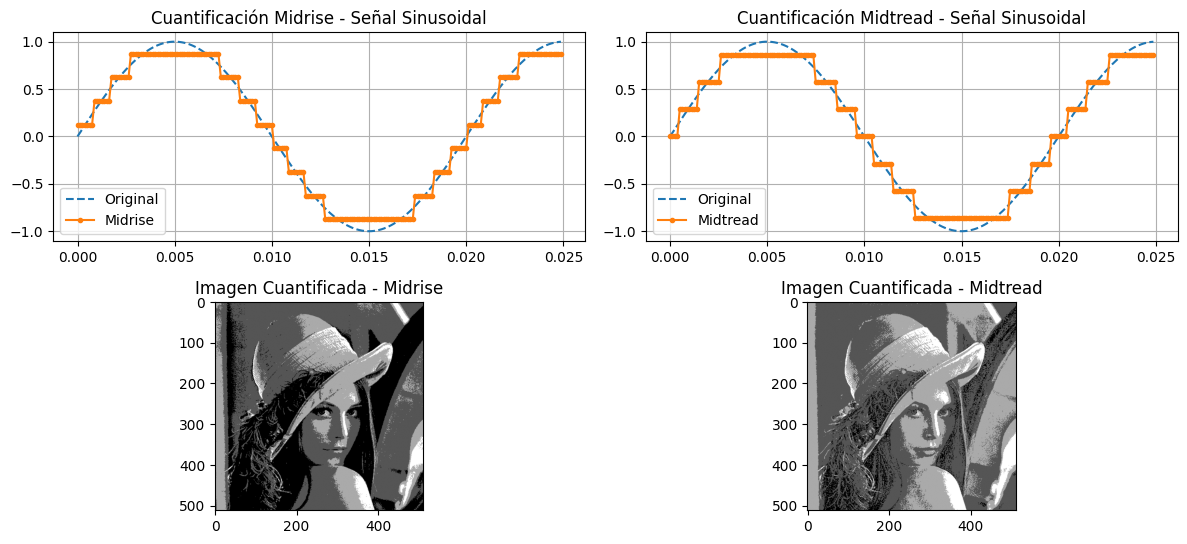

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from skimage import io, color
from scalib import UniformSQ, snr
from scipy.io import wavfile
import os

# Directorio donde están los archivos
data_path = "Datos/"

# Verificar que los archivos existen
audio_file = os.path.join(data_path, "altura.wav")
image_file = os.path.join(data_path, "lena.png")

if not os.path.exists(audio_file):
    raise FileNotFoundError(f"El archivo de audio {audio_file} no se encontró.")
if not os.path.exists(image_file):
    raise FileNotFoundError(f"El archivo de imagen {image_file} no se encontró.")

# 1. Generar una señal sinusoidal de 50 Hz muestreada a 8 kHz
fs = 8000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # 1 segundo de duración
x_sin = np.sin(2 * np.pi * 50 * t)  # Señal sinusoidal

# 2. Cargar la señal de voz altura.wav
fs_audio, x_audio = wavfile.read(audio_file)  # Leer archivo de audio
x_audio = x_audio / np.max(np.abs(x_audio))  # Normalizar a rango (-1,1)

# 3. Cargar la imagen lena.png en escala de grises
img = io.imread(image_file)
img_gray = color.rgb2gray(img)  # Convertir a escala de grises
img_gray = img_gray / np.max(img_gray)  # Normalizar a (0,1)

# Configuración de cuantificadores
b = 3  # 3 bits por muestra
xRange = (-1, 1)  # Rango de entrada

# Cuantificador de media contrahuella (mid-rise)
qtz_midrise = UniformSQ(b, xRange, qtype="midrise")

# Cuantificador de media huella (midtread)
qtz_midtread = UniformSQ(b, xRange, qtype="midtread")

# Cuantificación de la señal sinusoidal
xq_sin_midrise = qtz_midrise.quantize(x_sin)
xq_sin_midtread = qtz_midtread.quantize(x_sin)

# Cuantificación de la señal de voz
xq_audio_midrise = qtz_midrise.quantize(x_audio)
xq_audio_midtread = qtz_midtread.quantize(x_audio)

# Cuantificación de la imagen
xq_img_midrise = qtz_midrise.quantize(img_gray)
xq_img_midtread = qtz_midtread.quantize(img_gray)

# Cálculo de SNR
snr_sin_midrise = snr(x_sin, xq_sin_midrise)
snr_sin_midtread = snr(x_sin, xq_sin_midtread)

snr_audio_midrise = snr(x_audio, xq_audio_midrise)
snr_audio_midtread = snr(x_audio, xq_audio_midtread)

snr_img_midrise = snr(img_gray, xq_img_midrise)
snr_img_midtread = snr(img_gray, xq_img_midtread)

# Mostrar resultados de SNR
print(f"SNR Señal Sinusoidal - Midrise: {snr_sin_midrise:.2f} dB")
print(f"SNR Señal Sinusoidal - Midtread: {snr_sin_midtread:.2f} dB")

print(f"SNR Señal de Voz - Midrise: {snr_audio_midrise:.2f} dB")
print(f"SNR Señal de Voz - Midtread: {snr_audio_midtread:.2f} dB")

print(f"SNR Imagen - Midrise: {snr_img_midrise:.2f} dB")
print(f"SNR Imagen - Midtread: {snr_img_midtread:.2f} dB")

# Representación gráfica de la cuantificación
plt.figure(figsize=(12, 8))

# Señal sinusoidal cuantificada
plt.subplot(3, 2, 1)
plt.plot(t[:200], x_sin[:200], label="Original", linestyle='dashed')
plt.plot(t[:200], xq_sin_midrise[:200], label="Midrise", marker='o', markersize=3)
plt.title("Cuantificación Midrise - Señal Sinusoidal")
plt.legend()
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(t[:200], x_sin[:200], label="Original", linestyle='dashed')
plt.plot(t[:200], xq_sin_midtread[:200], label="Midtread", marker='o', markersize=3)
plt.title("Cuantificación Midtread - Señal Sinusoidal")
plt.legend()
plt.grid()

# Imagen cuantificada
plt.subplot(3, 2, 3)
plt.imshow(xq_img_midrise, cmap='gray')
plt.title("Imagen Cuantificada - Midrise")

plt.subplot(3, 2, 4)
plt.imshow(xq_img_midtread, cmap='gray')
plt.title("Imagen Cuantificada - Midtread")

# Reproducir las señales de voz cuantificadas
print("Reproduciendo señal cuantificada - Midrise...")
sd.play(xq_audio_midrise, fs_audio)
sd.wait()

print("Reproduciendo señal cuantificada - Midtread...")
sd.play(xq_audio_midtread, fs_audio)
sd.wait()

plt.tight_layout()
plt.show()

